In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

%matplotlib inline

In [4]:
data = load_digits()

## Carregando as imagens

In [64]:
X = data.images.reshape((len(data.images),8,8,1))
y = data.target

### Shape da informação

X tem shape de (1797 x 64) e Y tem (1797, ).

Isso se deve ao fato de X ser imagens de 8x8 (=64) pixels com 1 canal de cor. Y corresponde somente ao que a imagem é, no caso, números.



Mas para o Keras, temos que mostrar o Y como [OneHot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Ele não realiza essa etapa sozinho. 

O OneHotEncoding pode ser feito de diversas maneiras, escolhi fazer pelo Pandas com o [pd.getdummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [65]:
print(
    X.shape,
    y.shape
)

(1797, 8, 8, 1) (1797,)


In [92]:
y = pd.get_dummies(y)
y.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


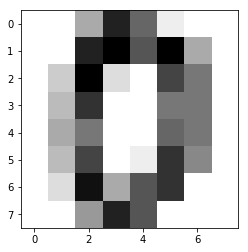

In [29]:
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

## Criando um modelo usando Keras

In [106]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Archtecture, compile and fitting the model

error: Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape

possivel solução: [Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape]()

In [117]:
input_img_dimensions=(8,8,1)

model = Sequential([
    Conv2D(10, kernel_size=3, activation='relu', input_shape=input_img_dimensions),
    Flatten(),
    Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=10)

Train on 1077 samples, validate on 270 samples
Epoch 1/3
1077/1077 [==============================] - 1s 805us/step - loss: 1.5106 - acc: 0.5896 - val_loss: 0.4550 - val_acc: 0.8630
Epoch 2/3
1077/1077 [==============================] - 0s 239us/step - loss: 0.2796 - acc: 0.9146 - val_loss: 0.2547 - val_acc: 0.9148
Epoch 3/3
1077/1077 [==============================] - 0s 226us/step - loss: 0.1423 - acc: 0.9526 - val_loss: 0.1741 - val_acc: 0.9407


In [116]:
model.evaluate(X_test, y_test)

450/450 [==============================] - 0s 88us/step


[0.2148000329401758, 0.9422222222222222]

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 6, 6, 10)          100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                410       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


# Vamos conferir a predição de um exemplo

In [143]:
print(
    np.argmax(model.predict(X_test)[0])
)

3


**Predição para o X_test na posição 0: O número é um 3**

**Ao mostrar a imagem do X_test[0] podemos ver que é um 3 ou um 8. **

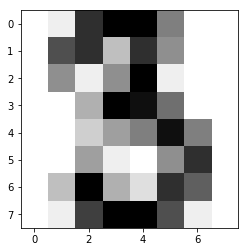

In [153]:
plt.imshow(X_test[0].reshape((8,8)), cmap=plt.cm.gray_r)

**O Y_test, coluna que mostra qual era o label verdadeiro, diz que é um 3**

In [152]:
y_test.iloc[0]

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: 1310, dtype: uint8